Основные шаги:

        Посмотреть на данные.
        Проверить данные на пустые значения.
        Проверить данные на дублированные/полностью скоррелированные значения.
        Проверить данные на наличие выбросов.
        Отобрать данные, пригодные для дальнейшего построения модели.

# Шаг 1. Посмотреть на данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind
stud_math=pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Описание датасета:

0 school — аббревиатура школы, в которой учится ученик

1 sex — пол ученика ('F' - женский, 'M' - мужской)

2 age — возраст ученика (от 15 до 22)

3 address — тип адреса ученика ('U' - городской, 'R' - за городом)

4 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

5 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

6 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

7 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

9 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

11 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

12 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

13 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

14 failures — количество внеучебных неудач (n, если 1<=n<=3)

15 schoolsup — дополнительная образовательная поддержка (yes или no)

16 famsup — семейная образовательная поддержка (yes или no)

17 paid — дополнительные платные занятия по математике (yes или no)

18 activities — дополнительные внеучебные занятия (yes или no)

19 nursery — посещал детский сад (yes или no)

20 studytime, granular - ???

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

В датасете 30 столбцов, 13 из них числовые, 17- стоковые.

# Шаг 2. Проверить данные на пустые значения.

In [2]:
# Функция для подсчета пустых значений
def missing_values_table(df):
        # Количество пропущенных значений
        mis_val = df.isnull().sum()
        
        # Процент пропущенных значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Таблица с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименовываем колонки
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортируем значения по проценту
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Печать дополнительной информации
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
       
        return mis_val_table_ren_columns

In [3]:
missing_values_table(stud_math)

Your selected dataframe has 30 columns.
There are 27 columns that have missing values.


,Missing Values,% of Total Values
Pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
Fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


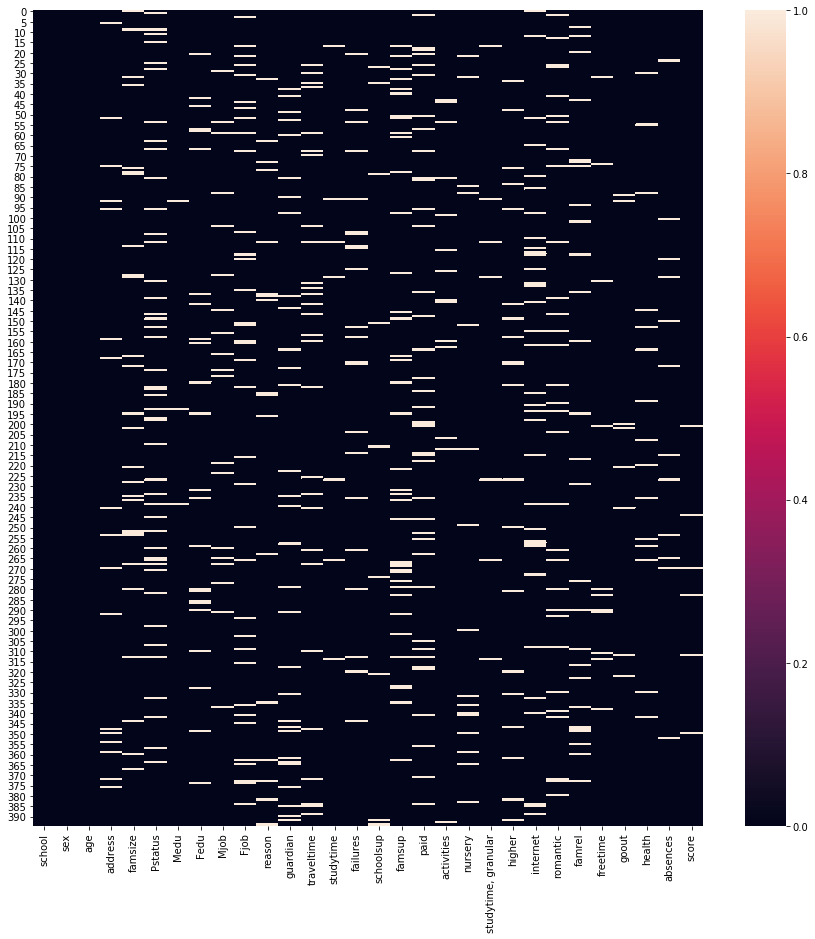

In [4]:
plt.subplots(figsize=(15, 15))
sns.heatmap(stud_math.isnull())

Вывод:
    Пропуски есть почти во всех столбцах, распределены равномерно, при построчном удалении пропусков, потеряется много данных.

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

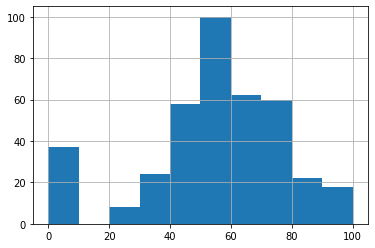

In [2]:
stud_math.score.hist()
stud_math.score.describe()

In [5]:
stud_math[stud_math.score==0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,...,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,...,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,...,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,...,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,...,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,...,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,...,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


# Шаг 3. Проверить данные на дублированные/полностью скоррелированные значения.

In [3]:
corr=stud_math.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,-2.518109e-01,0.015556,6.889897e-02,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-3.835013e-02,-0.078589,-1.005006e-02,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,7.703756e-03,-0.057199,4.057651e-02,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-5.730779e-03,0.102206,-1.685714e-02,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,3.787861e-02,-1.000000,4.589445e-02,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,4.787978e-03,0.178992,-2.265458e-02,0.098382,0.120914,0.081284,0.057391,-0.344338
schoolsup,-0.251811,-0.038350,0.007704,-0.005731,0.037879,0.004788,1.000000e+00,-0.037879,2.902132e-18,-0.056520,-0.036617,-0.028299,0.109803,-0.086598
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,-3.787861e-02,1.000000,-4.589445e-02,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,2.902132e-18,-0.045894,1.000000e+00,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,-5.651978e-02,0.121969,1.757430e-01,1.000000,0.296437,0.061575,0.009292,0.019026


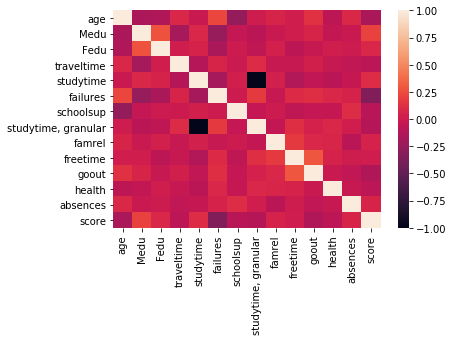

In [4]:
sns.heatmap(corr)

Вывод:
    У столбцов studytime и studytime, granular корреляция -1. Они дублируют друг друга, studytime, granular можно убрать.

In [6]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

# Шаг 4.Проверить данные на наличие выбросов.

In [7]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

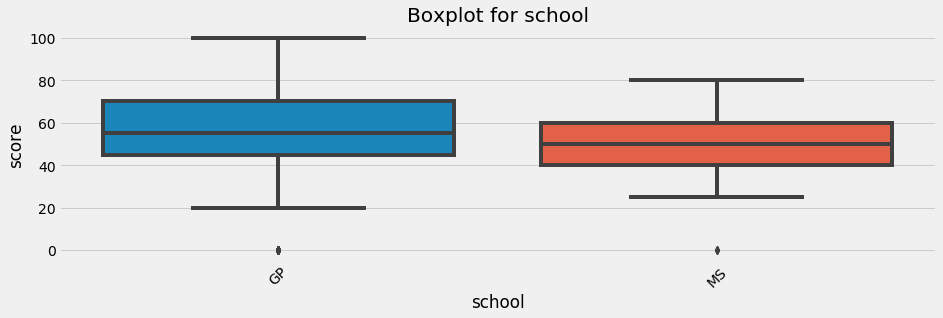

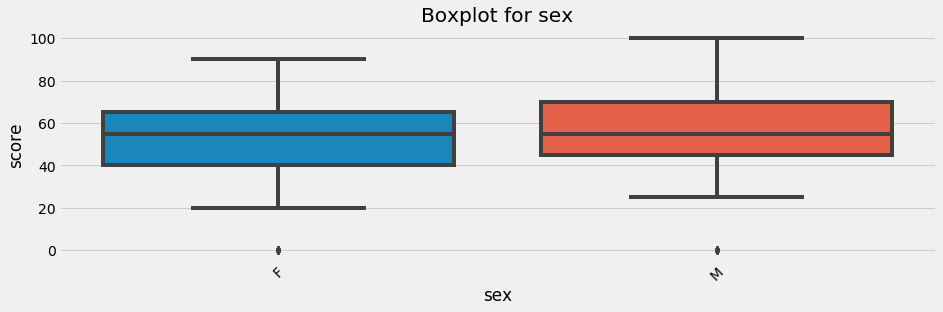

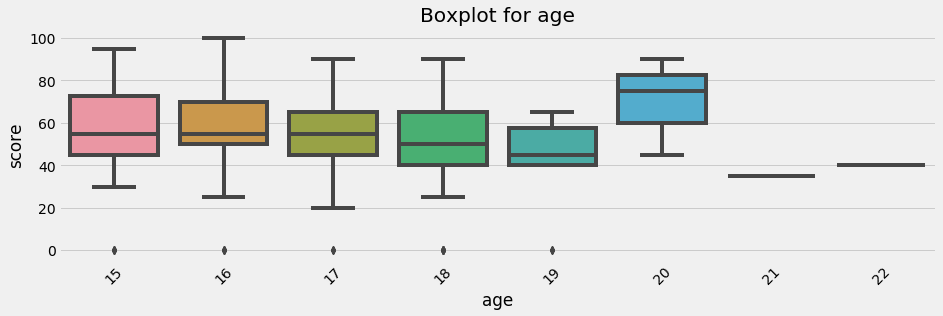

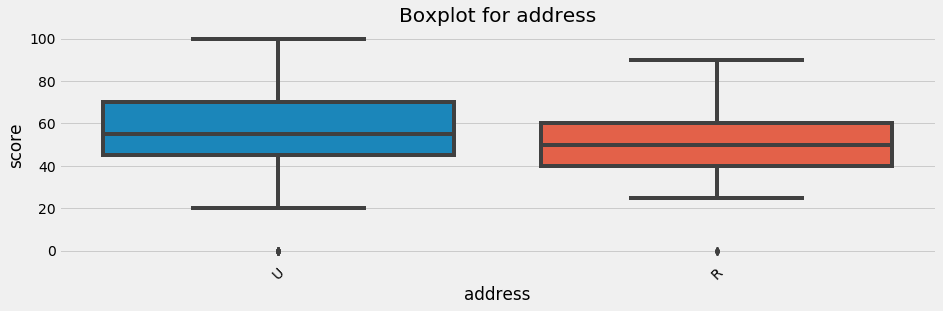

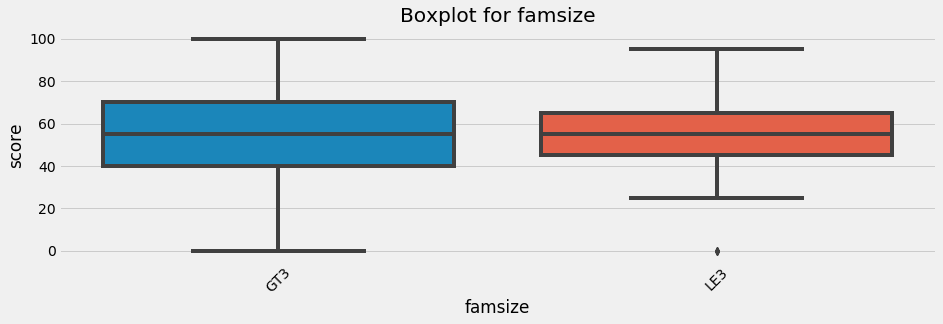

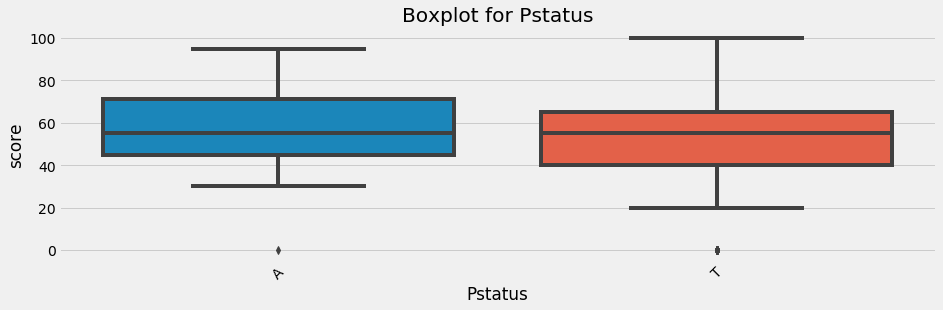

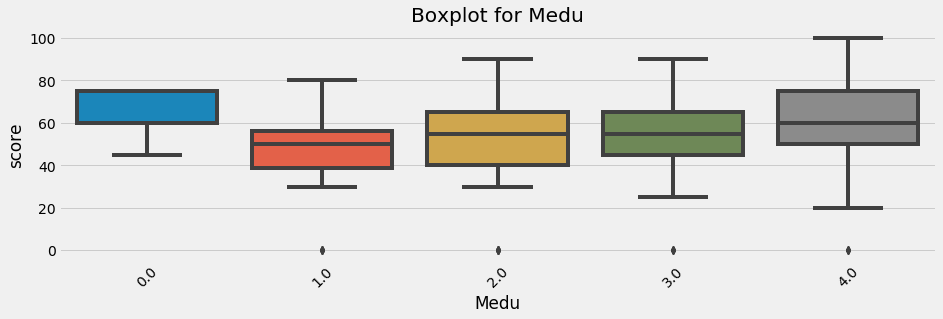

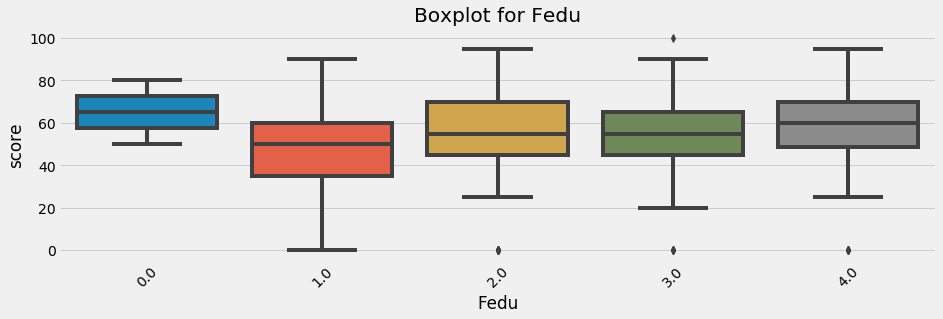

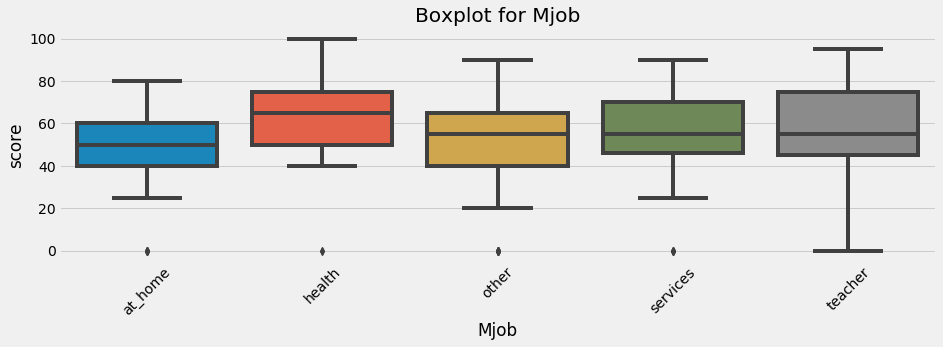

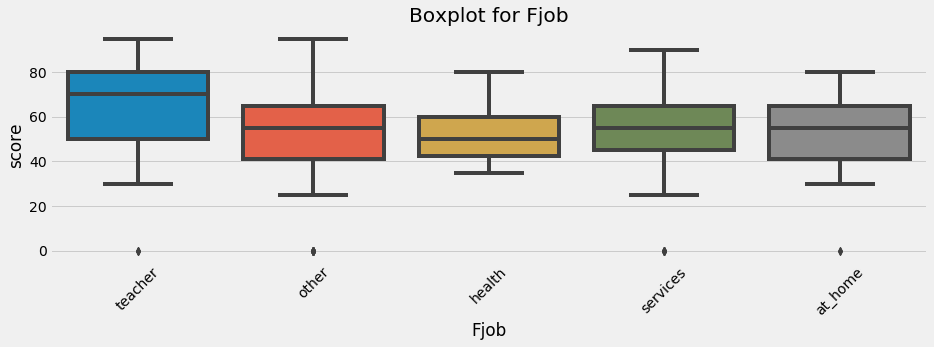

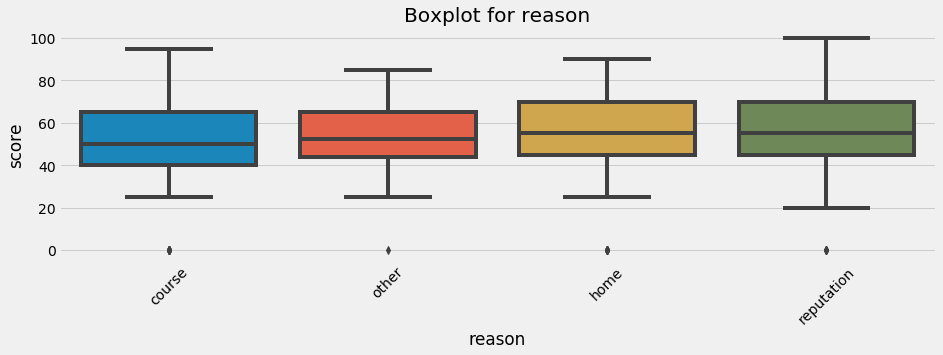

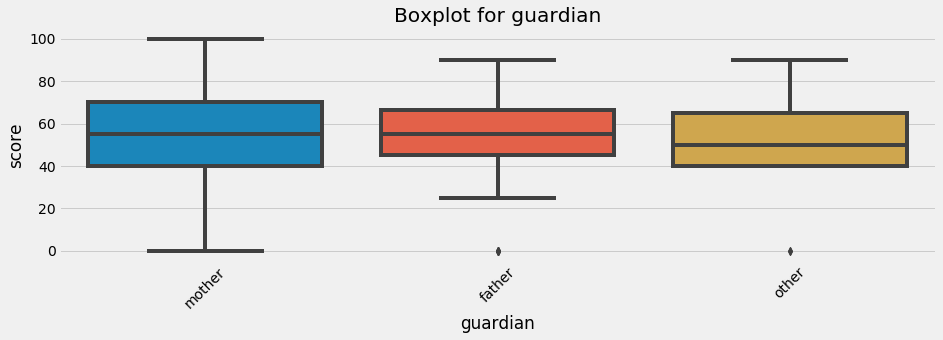

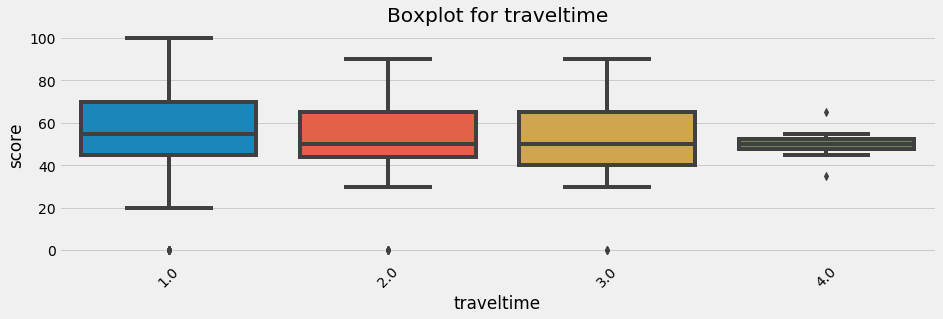

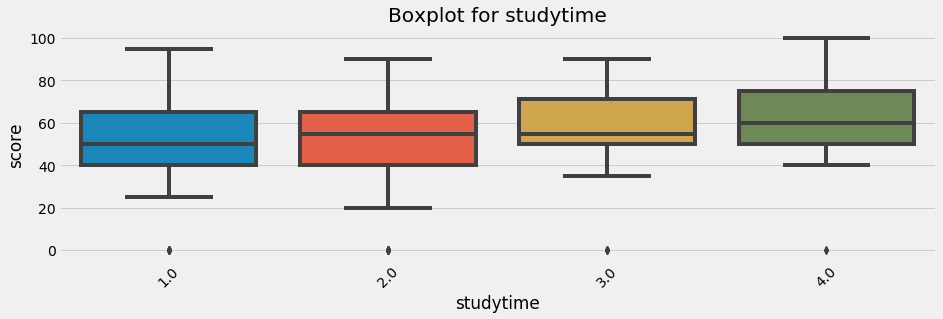

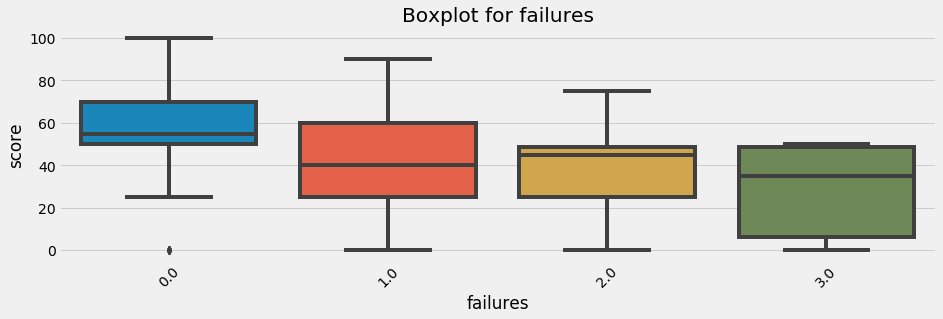

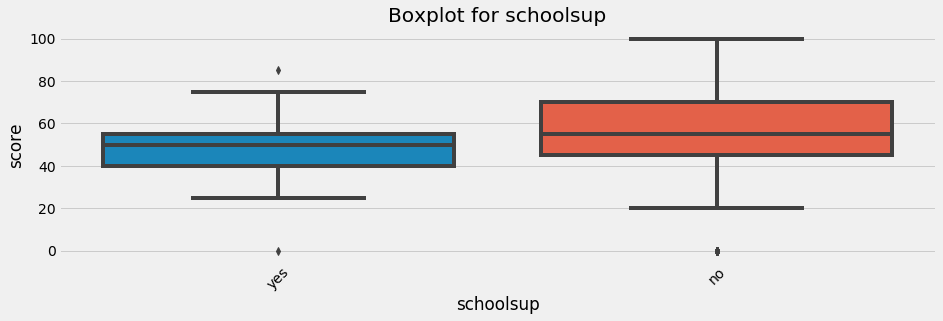

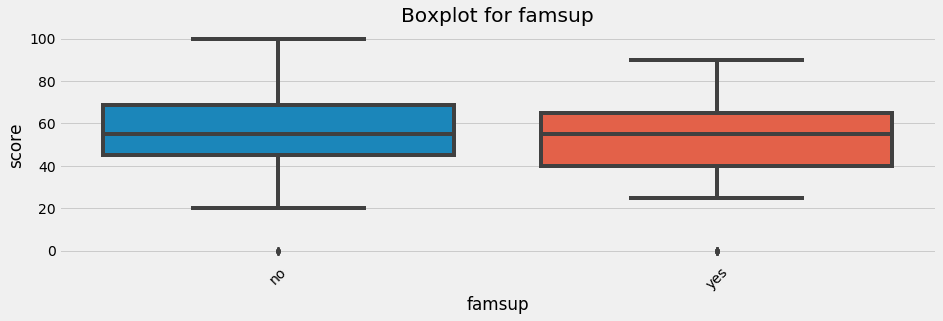

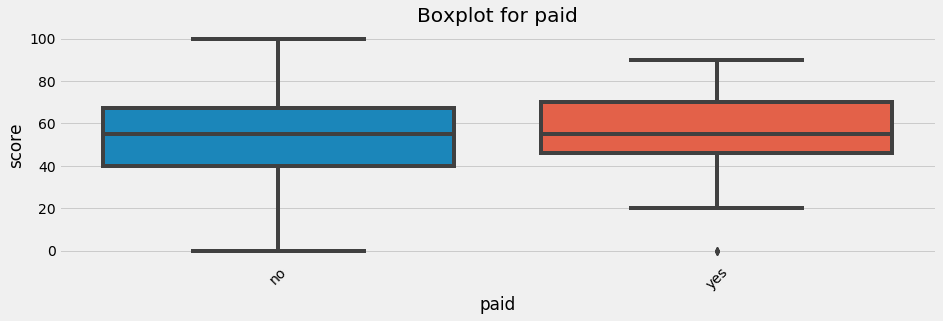

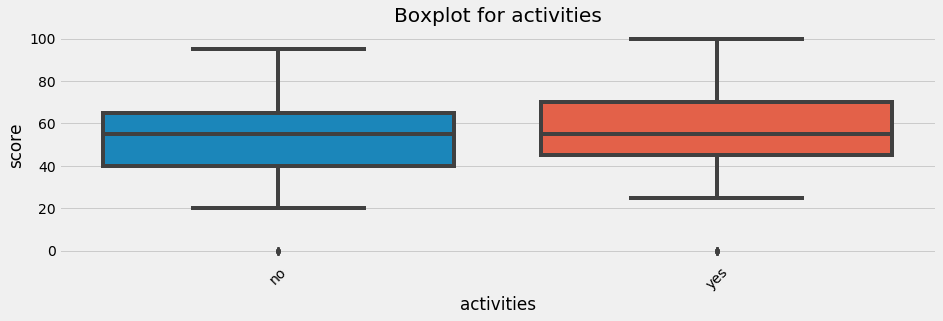

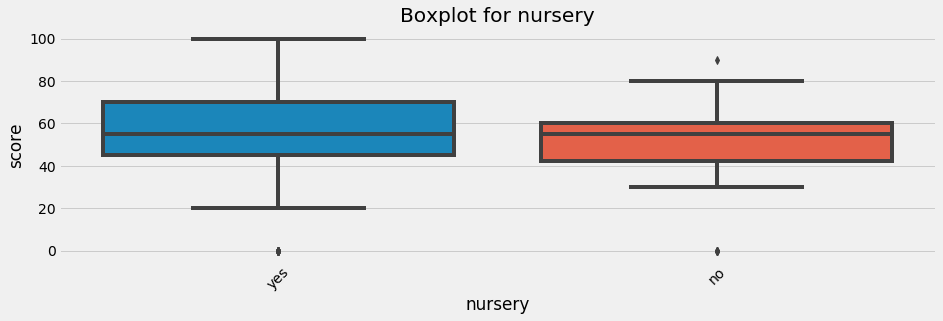

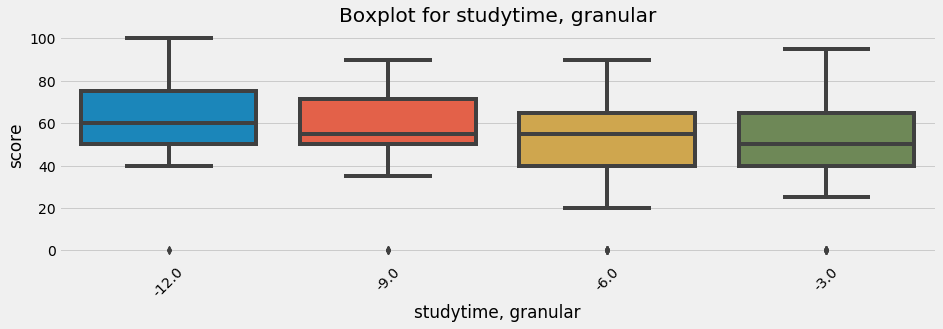

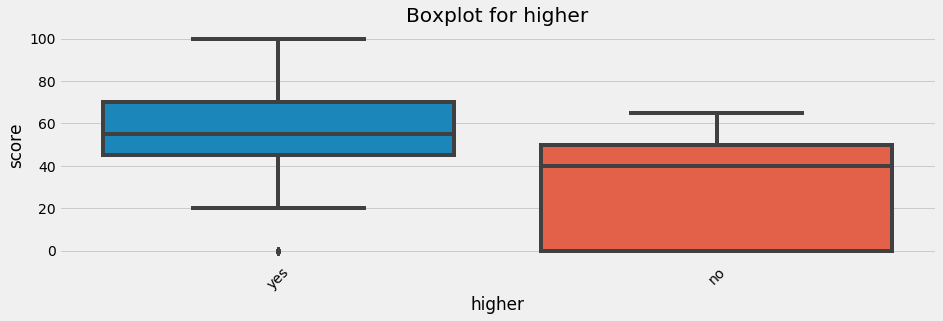

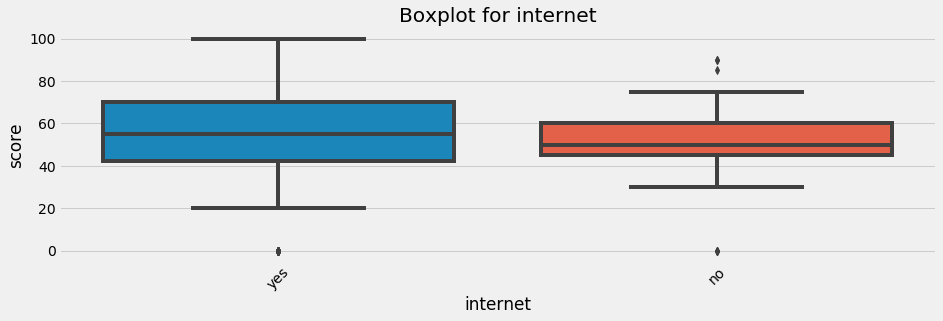

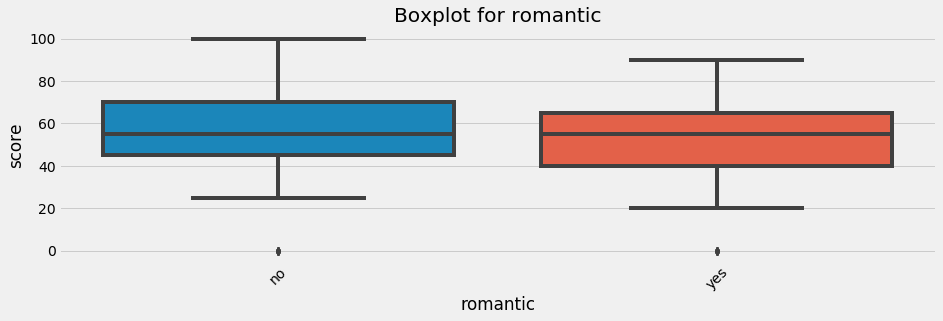

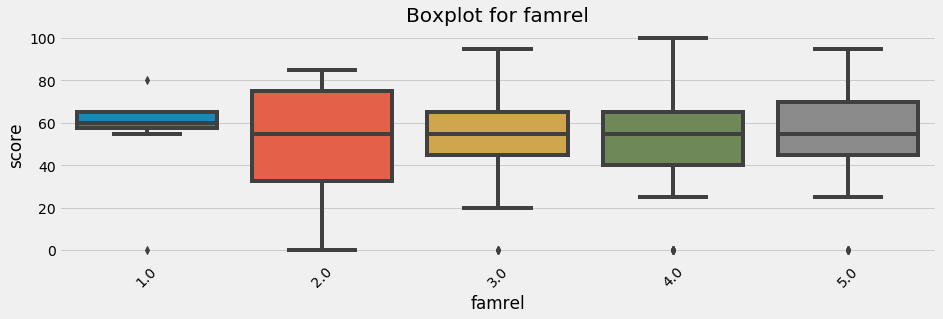

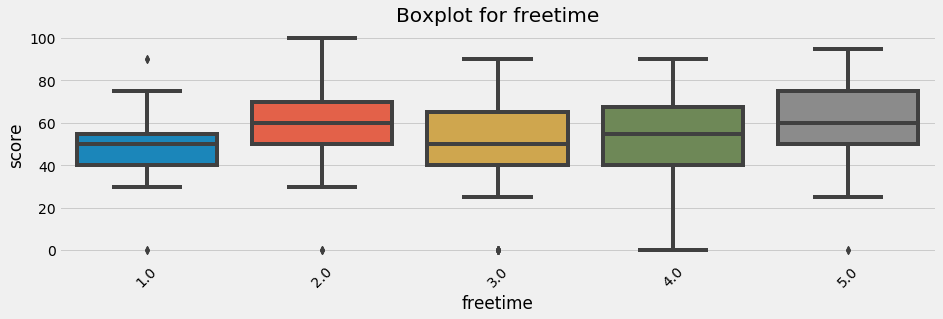

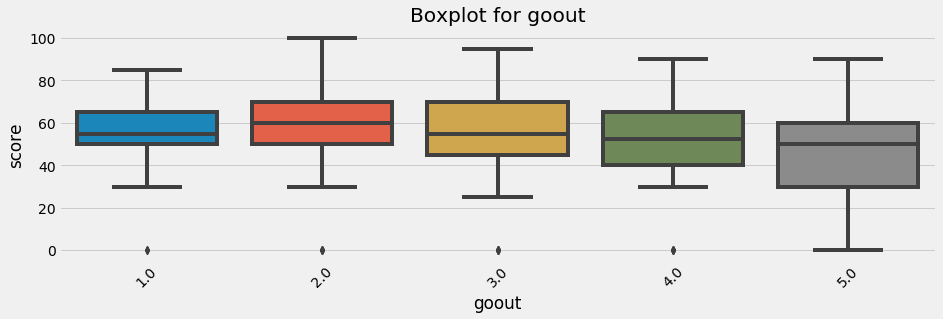

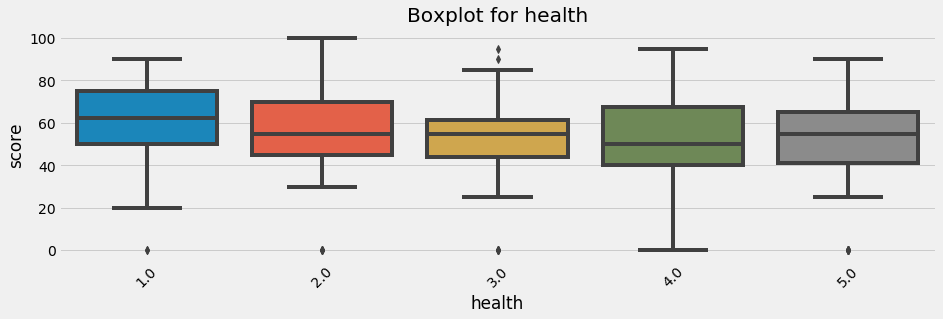

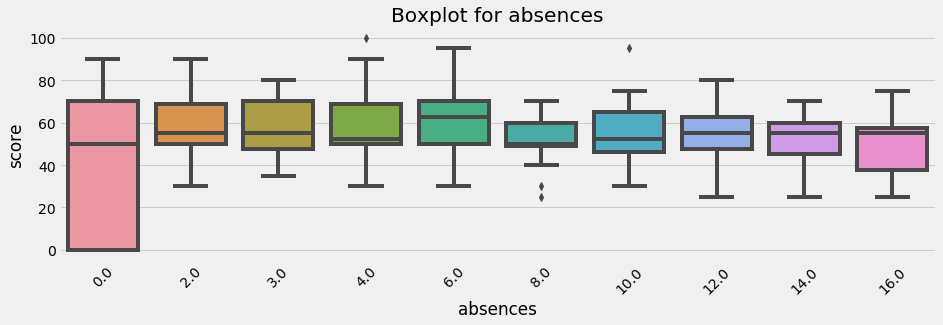

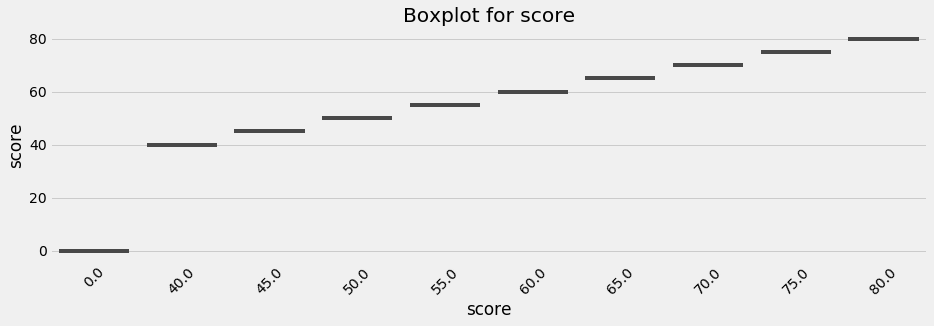

In [8]:
for col in stud_math.columns:
    get_boxplot(col)

Вывод:
    Обнаружены нереалистичные значения в двух столбцах: 'Fedu' и 'famrel'.
   

In [8]:
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [9]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Они представлены в единичных случаях, посчитаем за опечатку и заменим.

In [7]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 4.0 if x == 40.0 else x)
stud_math.famrel = stud_math.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

Посмотрев на данные сквозь призму боксплотов, принимаю решение придерживаться первого пути и удалить нулевые значения и пропуски в целевой переменной.

In [3]:
stud_math = stud_math[stud_math['score'].notna()]
stud_math.drop(stud_math[stud_math['score'] == 0].index , inplace=True)
stud_math.shape[0]

352

In [9]:
# фукция для построения распределния и получения данных по iqr
def iqr(q):
    median = q.median()
    IQR = q.quantile(0.75) - q.quantile(0.25)
    perc25 = q.quantile(0.25)
    perc75 = q.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),"IQR: {}, \
          ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    sns.distplot(q.loc[q.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)])

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,            Границы выбросов: [7.5, 107.5].


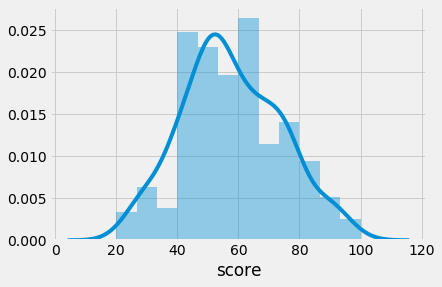

In [14]:
iqr(stud_math.score)

In [15]:
stud_math = stud_math.loc[stud_math.score.between(8, 100)]
stud_math.shape[0]

352

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

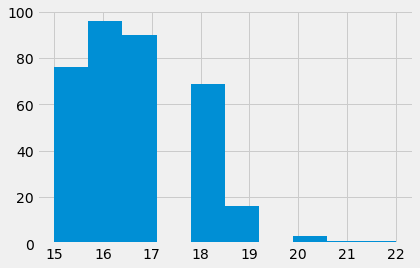

In [16]:
stud_math.age.fillna(stud_math.age.median(), inplace=True)
stud_math.age.hist()
stud_math.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,            Границы выбросов: [13.0, 21.0].


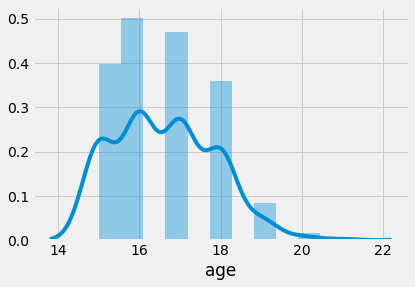

In [18]:
iqr(stud_math.age)

In [19]:
stud_math = stud_math.loc[stud_math.age.between(15, 21)]
stud_math.shape[0]

351

count    351.000000
mean       7.951567
std       24.390641
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

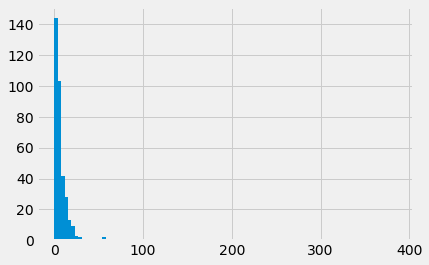

In [26]:
stud_math.absences.fillna(stud_math.absences.median(), inplace=True)
stud_math.absences.hist(bins=100)
stud_math.absences.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,            Границы выбросов: [-7.0, 17.0].


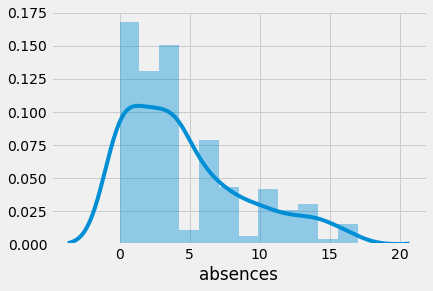

In [27]:
iqr(stud_math.absences)

In [28]:
stud_math = stud_math.loc[stud_math.absences.between(0, 17)]
stud_math.shape[0]

324

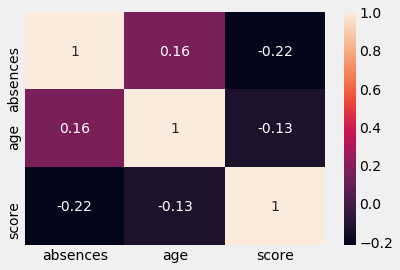

In [37]:
sns.heatmap(stud_math[['absences', 'age', 'score']].corr(), annot=True)

# Шаг 5. Отобрать данные, пригодные для дальнейшего построения модели.

In [34]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [35]:
for col in ['school', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
            'goout', 'health', 'sex', 'address', 'famsize', 'Pstatus',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet','romantic'
           ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки health
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


# Выводы: